In [1]:
# Import numpy, pandas, and matplotlib

import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

## Create some laboratory data with normal ranges

* The normal range for sodium in approximately 135-145

(array([ 300.,  305.,  285.,  299.,  302.,  282.,  319.,  303.,  330.,  275.]),
 array([ 125.00306475,  128.00230843,  131.00155212,  134.0007958 ,
         137.00003948,  139.99928316,  142.99852684,  145.99777052,
         148.9970142 ,  151.99625788,  154.99550156]),
 <a list of 10 Patch objects>)

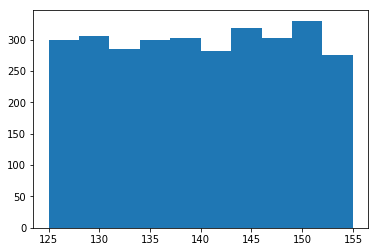

In [6]:
sodium_dist = []

min_val = 125.0
max_val = 155.0

for x in range(3000):
    # Create a random float in the range of min_val to max_val
    random_sodium = (max_val - min_val) * np.random.random_sample() + min_val
    sodium_dist.append(random_sodium)
plt.hist(sodium_dist)

### The array above has random values all within the physiologic range, but in reality the data should have a normal distribution

* Create "random" data, but normally distributed

(array([   5.,   38.,  138.,  411.,  745.,  842.,  575.,  200.,   40.,    6.]),
 array([ 123.14061492,  126.34389653,  129.54717813,  132.75045974,
         135.95374135,  139.15702295,  142.36030456,  145.56358617,
         148.76686778,  151.97014938,  155.17343099]),
 <a list of 10 Patch objects>)

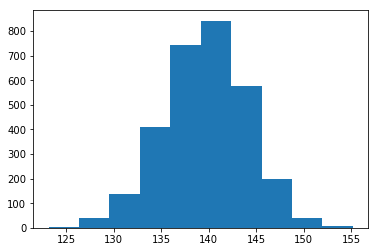

In [9]:
mean_val = 139.594283
std_dev = 4.475274

# Create a random float in the range of min_val to max_val
sodium_dist = np.random.normal(139.594283, 4.475274, 3000)

plt.hist(sodium_dist)

In [11]:
lab_ranges = [
    {"name":"sodium", "mean":139.594283, "stdev":4.475274},
    {"name":"potassium", "mean":4.199993, "stdev":0.578461}
]

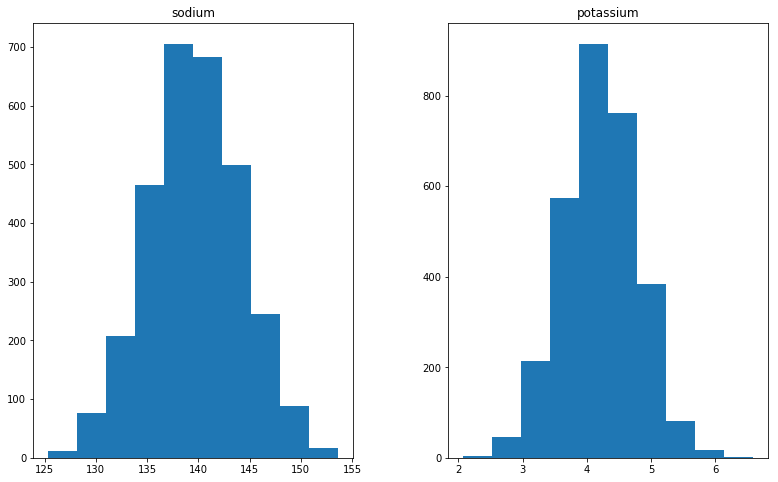

In [22]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0.05, wspace=0.3)

i = 0
for val in lab_ranges:
    i = i + 1
    distribution = np.random.normal(val['mean'], val['stdev'], 3000)
    g1 = fig.add_subplot(1, len(lab_ranges), i, title=val['name'])
    g1 = plt.hist(distribution)   

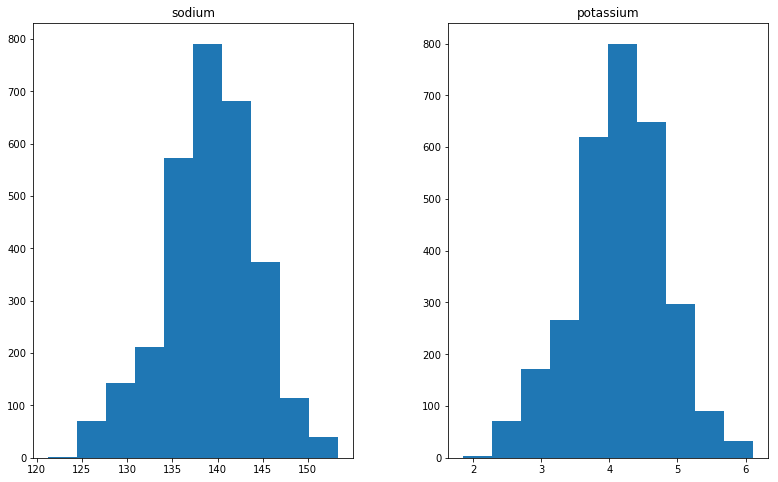

In [29]:
low_err_rate = 0.05
high_err_rate = 0.01

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0.05, wspace=0.3)

i = 0
for val in lab_ranges:
    i = i + 1
    
    distribution = []
    for x in range(3000):
        # Create a random number to determine whether to generate a normally distributed
        # or skewed value
        
        chance = np.random.random()
        if chance <= low_err_rate:
            max_val = val['mean'] - (val['stdev'] * 2)
            min_val = val['mean'] - (val['stdev'] * 3)
            distribution.append( (max_val - min_val) * np.random.random_sample() + min_val )
        elif chance >= (1.0 - high_err_rate):
            min_val = val['mean'] + (val['stdev'] * 2)
            max_val = val['mean'] + (val['stdev'] * 3)
            distribution.append( (max_val - min_val) * np.random.random_sample() + min_val )
        else:
            # Create a randomly distributed value
            distribution.append( np.random.normal(val['mean'], val['stdev']) )
    
    g1 = fig.add_subplot(1, len(lab_ranges), i, title=val['name'])
    g1 = plt.hist(distribution)   